In [ ]:
# Lane Line Detection
This project uses traditional computer vision techniques implemented in Python and OpenCV to identify lane lines on the road
![u.png](attachment:u.png)
## Image Processing Pipeline
The image processing pipeline can be divided into 3 stages which involves the following techniques
1. Find Region Of Interest(ROI)
2. Image processing
    i.  Gray image Coversion
    ii. Canny Edge Detection
    iii.Hough Lines Transform
3. Draw Detected lines

##  Libraries and Packages
Following are the Libraries and Packages used in the project.

In [13]:
import cv2
import numpy as np

### Flow of the code
The flow of the proposed Algorithm will be shown in next steps
#### 1. Video as Input:
A video is taken as input, further we extract frames of the video. On each frame processing is performed. Later after line detection the frames are displayed.

In [14]:
cap = cv2.VideoCapture('VID-20191229-WA0064.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)

#### 2. Grayscale Conversion:
An RGB color image is a vector valued function across the image spatial domain.This is one of the essential steps before detecting lane edges. The reason for doing this conversion from multi-channelled image to single-channelled is because we are only concerned about the intensity data, which means we can safely ignore the colors.The grayscale step will help make the main lane lines stand out. 
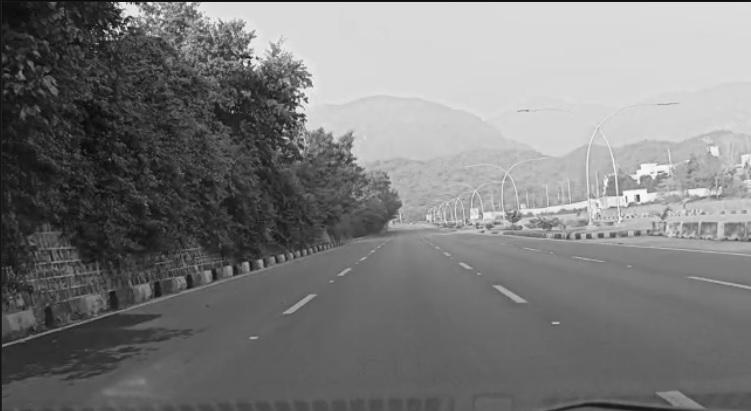

#### 3. Canny Edge Detection
After conversion of image to grayscale before isolating the region of interest. The next step is to run canny edge detection in OpenCV. 
The Canny edge detector is a classic edge detection algorithm. It reduce the amount of information in an image down to the useful structural edges present. It Apply double threshold to determine potential edges.Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.
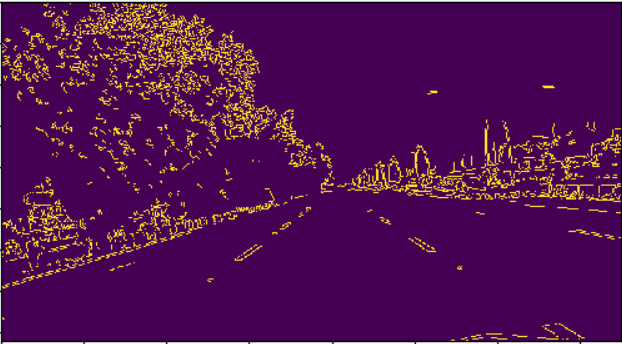

#### 4. Finding the Region Of Interest (ROI)
The region which was found to contain the most amount of road and exclude the most amount of background across the test images was a three sided triangle.
By finding the height and width of video frame we found all three coordinates of the triangle by using the 'image.shape'
- Left bottom corner = (0,height)
- Right bottom corner = (height, width)
- Center corner = (height/2, width/2)
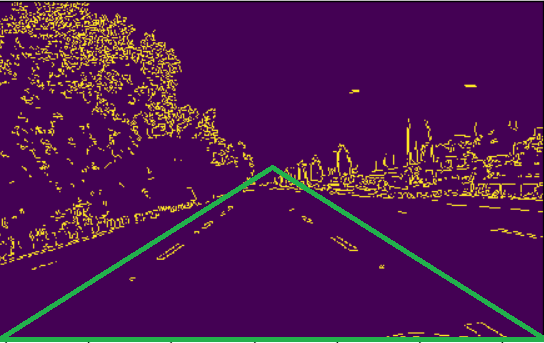
 
#### 5.Masking the ROI
Mask is created which is equal to the size of video frame. Excluding all content outside the ROI mask for the Canny edge detector then further reduces the information in the image to the lane line edges. This elimination of unwanted edges id done using 'cv2.fillpoly'
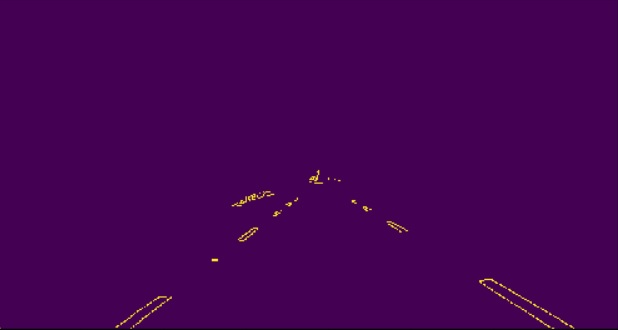



In [15]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    mask_image = cv2.bitwise_and(img, mask)
    return mask_image

#### 6. Hough Transform
The Hough transform is a feature extraction technique that is popular in computer vision and image analysis that is used to find straight lines in an image. Any "x vs y" line can be transformed to a point in Hough space, the basis of which is made up of "m vs b" (gradient vs intercept of the line). The hough transform is the algorithm that converts the representation of straight lines between these two spaces. Any line in an image has a direct mapping to a point in Hough space.
<br> It is often convenient to work with the Hough transform in polar coordinates, doing so results in the following hyper-parameters that again need to be found by empirically testing on test data sets.
<br> rho : Distance resolution in pixels of the Hough grid
<br> theta : Angular resolution in radians of the Hough grid
<br> threshold : Minimum number of votes (Intersections on the Hough Grid)
<br> min line length : Minimum number of pixels making up the line
<br> max line gap : Maximum gap in pixels between the connectable line segments


In [16]:
def process(image):
    print(image.shape)
    h = image.shape[0]
    w = image.shape[1]
    roi_vertices = [(0, h), (w/2, h/2),(w, h)]
    #gaussian_image=cv2.GaussianBlur(image,(5,5),0)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny = cv2.Canny(gray, 150, 170)
    cropped_image = roi(canny,
                    np.array([roi_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,rho=2, theta=np.pi/180, threshold=50, lines=np.array([]), minLineLength=40, maxLineGap=100)
    image_lines = draw_lines(image, lines)
    return image_lines

 #### 7. Draw lines on blank Image
A blank image is created which is excatly equal to the size of video frame. The lines on the blank image will be drawn on the coordinates found using hough transform.
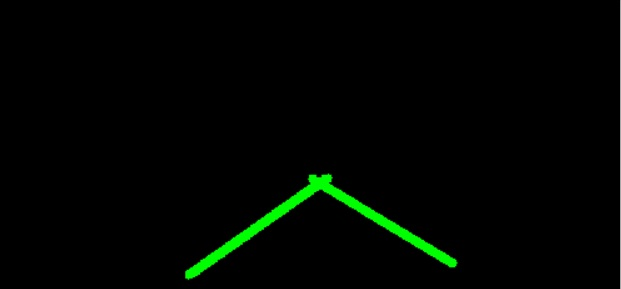

In [17]:
def draw_lines(img, lines):
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

#### 8. Detection of lines
Video frame is superimposed with marked lines on blank image which will eventually create a frame showing detected lines.  
Using the 'cv2.addWeighted' function is it possible to view the dectected lines superimposed on the input image set for all the video frames.
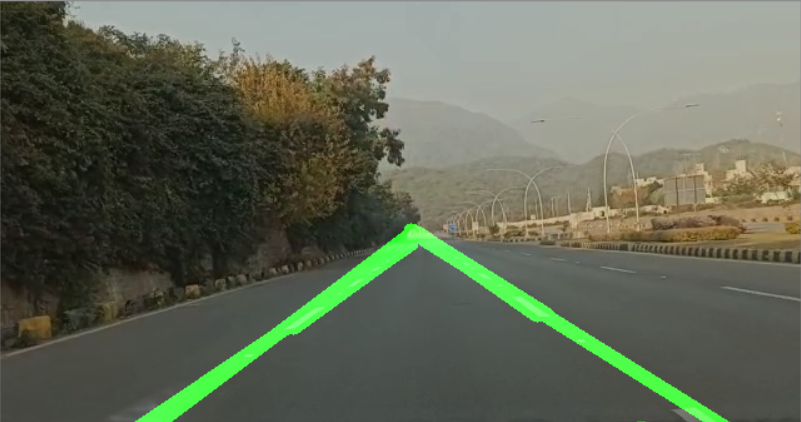